### Setup and load the data first

In [1]:
import numpy as np
import pandas as pd
import gc

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from load_data import load_data

dataDir = 'C:\\Users\simin\OneDrive\Documents\Kaggle\Credit Default\data/'

df = load_data(dataDir)

Data already existed.


### Data preprocessing

In [2]:
# Missing values percentage
missing = df.isnull().sum().sort_values(ascending=False)*100 / df.shape[0]
missing_Index = list(missing[missing > 50].index.values)

# Make sure we are not deleting TARGET variable
if 'TARGET' in missing_Index:
    missing_Index.remove('TARGET')
    
df = df.drop(missing_Index, axis = 1)

### Train Models

In [2]:
#Validation function
n_folds = 5

df_train = df[df['TARGET'].notnull()]
df_test = df[df['TARGET'].isnull()]

y_train = df_train['TARGET']
X_train = df_train.drop(['TARGET','index'], axis = 1)
X_test = df_test.drop(['index'], axis = 1)

print("Train shape: {}, test shape: {}".format(X_train.shape, X_test.shape))
del df_train, df_test
gc.collect()

Train shape: (307507, 719), test shape: (48744, 720)


7

In [1]:
from lightgbm import LGBMClassifier
from models import kfold_model

# LightGBM 
model_lgb = LGBMClassifier(
                nthread=-1,
                #is_unbalance=True,
                n_estimators=10000,
                learning_rate=0.02,
                num_leaves=32,
                colsample_bytree=0.9497036,
                subsample=0.8715623,
                max_depth=8,
                reg_alpha=0.04,
                reg_lambda=0.073,
                min_split_gain=0.0222415,
                min_child_weight=40,
                silent=-1,
                verbose=-1 #scale_pos_weight=11 
                )

C:\Users\simin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
feat_importance, test_output = kfold_model(model_lgb, 'lightgbm'， X_train, y_train, X_test, n_folds, stratified= True, debug= False)

In [6]:
test_output.to_csv('submission_lgbm1.csv', index=False)

In [3]:
from xgboost import XGBClassifier
from models import kfold_model

# LightGBM 
model_xgb = XGBClassifier(
                objective = "binary:logistic",
                nthread = -1,
                max_depth = 6,
                min_child_weight = 40,
                gamma = 0,
                subsample = 0.85,
                colsample_bytree = 0.9497036,
                colsample_bylevel = 0.632,
                reg_alpha= 0.04,
                reg_lambda=0.073, 
                n_estimators = 10000
            )

C:\Users\simin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0]	validation_0-auc:0.735867	validation_1-auc:0.723373
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:0.825013	validation_1-auc:0.781468
[200]	validation_0-auc:0.851003	validation_1-auc:0.787874
[300]	validation_0-auc:0.870628	validation_1-auc:0.788879
[400]	validation_0-auc:0.885051	validation_1-auc:0.789088
[500]	validation_0-auc:0.89757	validation_1-auc:0.78851
[600]	validation_0-auc:0.9087	validation_1-auc:0.787889
Stopping. Best iteration:
[416]	validation_0-auc:0.887226	validation_1-auc:0.789297

Fold  1 AUC : 0.787951
[0]	validation_0-auc:0.736188	validation_1-auc:0.723818
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[100]	validation_0-auc:0.825316	validation_1-auc:0.782425
[200]	validation_0-auc:0.850458	validation_1-auc:0.786441
[300

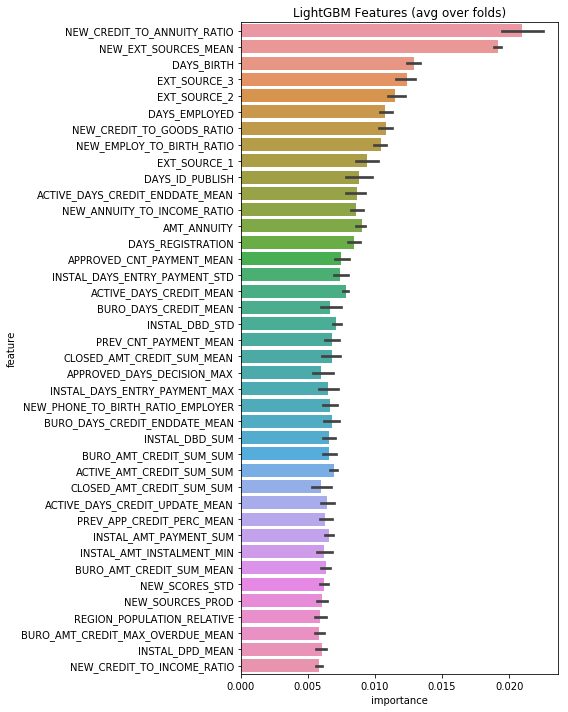

In [4]:
feat_importance, test_output = kfold_model(model_xgb, 'xgboost', X_train, y_train, X_test, n_folds, stratified= True, debug= False)

In [5]:
test_output.to_csv('submission_xgb.csv', index=False)

In [3]:
from lightgbm import LGBMClassifier
from models import kfold_model

# RF
model_lgb_rf = LGBMClassifier(
                  nthread=-1,
                  boosting_type='rf',
                  bagging_freq = 1, 
                  bagging_fraction = 0.632, 
                  feature_fraction = 0.632,
                  #is_unbalance=True,
                  n_estimators=10000,
                  learning_rate=0.02,
                  num_leaves=60,
                  colsample_bytree=0.9497036,
                  subsample=0.8715623,
                  max_depth=16,
                  reg_alpha=0.04,
                  reg_lambda=0.073,
                  min_split_gain=0.0222415,
                  min_child_weight=40,
                  silent=-1,
                  verbose=-1 #scale_pos_weight=11 
                  )

C:\Users\simin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.756953	valid_1's auc: 0.743921
[200]	training's auc: 0.757838	valid_1's auc: 0.744631
[300]	training's auc: 0.757202	valid_1's auc: 0.744045
Early stopping, best iteration is:
[178]	training's auc: 0.757855	valid_1's auc: 0.744674
Fold  1 AUC : 0.744674
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.759358	valid_1's auc: 0.746084
[200]	training's auc: 0.760095	valid_1's auc: 0.746592
Early stopping, best iteration is:
[16]	training's auc: 0.761686	valid_1's auc: 0.747891
Fold  2 AUC : 0.747891
Training until validation scores don't improve for 200 rounds.
[100]	training's auc: 0.757099	valid_1's auc: 0.747182
[200]	training's auc: 0.758149	valid_1's auc: 0.747632
[300]	training's auc: 0.757605	valid_1's auc: 0.747063
Early stopping, best iteration is:
[178]	training's auc: 0.758139	valid_1's auc: 0.747659
Fold  3 AUC : 0.747659
Training until validation scores 

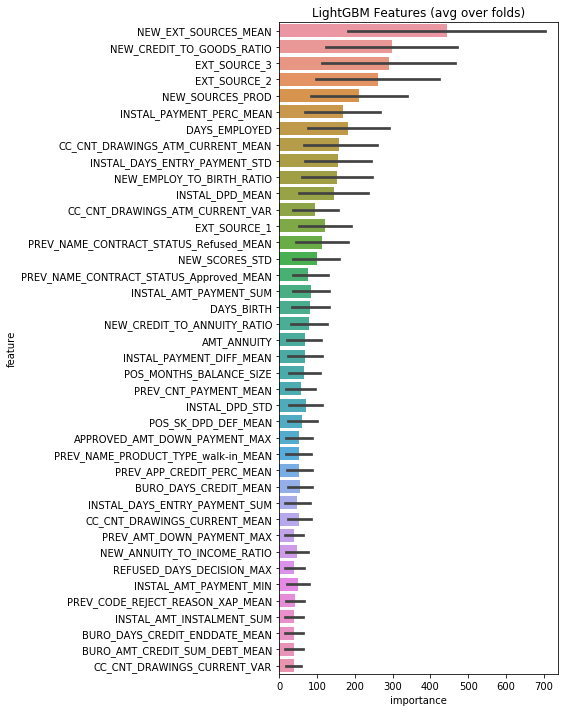

In [4]:
feat_importance, test_output = kfold_model(model_lgb_rf, 'lightgbm', X_train, y_train, X_test, n_folds, stratified= True, debug= False)

In [5]:
test_output.to_csv('submission_lgbm_rf1.csv', index=False)

In [6]:
rf = pd.read_csv('submission_lgbm_rf1.csv')
xgb = pd.read_csv('submission_xgb.csv')
lgbm = pd.read_csv('submission_lgbm1.csv')

In [11]:
df['SK_ID_CURR'] = lgbm.SK_ID_CURR

In [15]:
df['TARGET']  = 0.5*lgbm.TARGET + 0.4*xgb.TARGET + 0.1*rf.TARGET

In [17]:
df.to_csv('submission_blend1.csv', index=False)